In [7]:
import json

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

with open("../config.json") as json_data_file:
    general_config = json.load(json_data_file)

dataset_path = general_config["Kaggle_Path_Alt"]

In [8]:
import pandas as pd

df = pd.read_csv("../statistics/instruments_complete_features.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,E:\LICENTA\instruments_equalised\Acoustic_guit...,66150,0.245755,0.098590,0.056768,0.005147,977.070957,170887.223470,1443.498984,170737.430235,...,18.090530,7.389156,63.679657,9.709290,30.392721,3.605948,59.277170,0.854235,28.218355,Acoustic_guitar
1,E:\LICENTA\instruments_equalised\Acoustic_guit...,66150,0.220657,0.090925,0.178422,0.006080,1588.283917,676105.990113,2016.503534,298664.509757,...,159.693280,3.860400,115.470920,12.041192,199.107570,2.039952,166.832030,5.692456,91.698680,Acoustic_guitar
2,E:\LICENTA\instruments_equalised\Acoustic_guit...,66150,0.176924,0.076408,0.044460,0.003549,841.879696,21242.211766,1569.409304,82663.974362,...,26.261026,16.589718,22.789637,9.577040,8.952516,6.102745,8.277847,4.518650,9.067874,Acoustic_guitar
3,E:\LICENTA\instruments_equalised\Acoustic_guit...,66150,0.190872,0.094317,0.051758,0.004162,890.470113,30064.871596,1536.243364,78541.720037,...,23.932419,18.363690,29.398151,8.077231,17.637049,5.955007,20.923979,7.048464,7.303474,Acoustic_guitar
4,E:\LICENTA\instruments_equalised\Acoustic_guit...,66150,0.138034,0.076519,0.074255,0.007900,560.533640,12840.898985,628.393279,71073.851684,...,21.718920,-3.982179,35.987328,-3.387496,40.806038,0.258488,13.812200,2.305801,22.196413,Acoustic_guitar


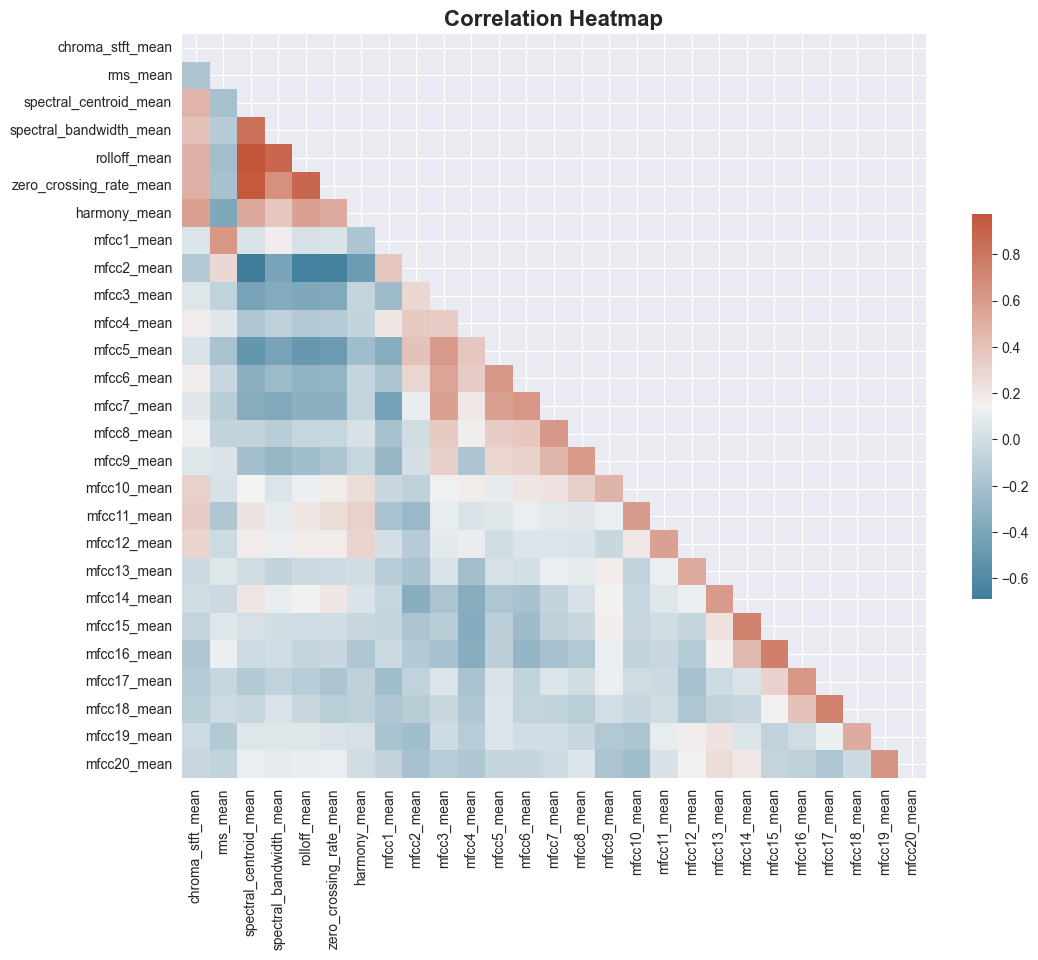

In [9]:
mean_columns = df.filter(regex='_mean$')

correlation_matrix = mean_columns.corr()

# Create a boolean mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=False, linewidths=0,
            cbar_kws={"shrink": .5}, square=True)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

Text(0, 0.5, 'Second Principal Component')

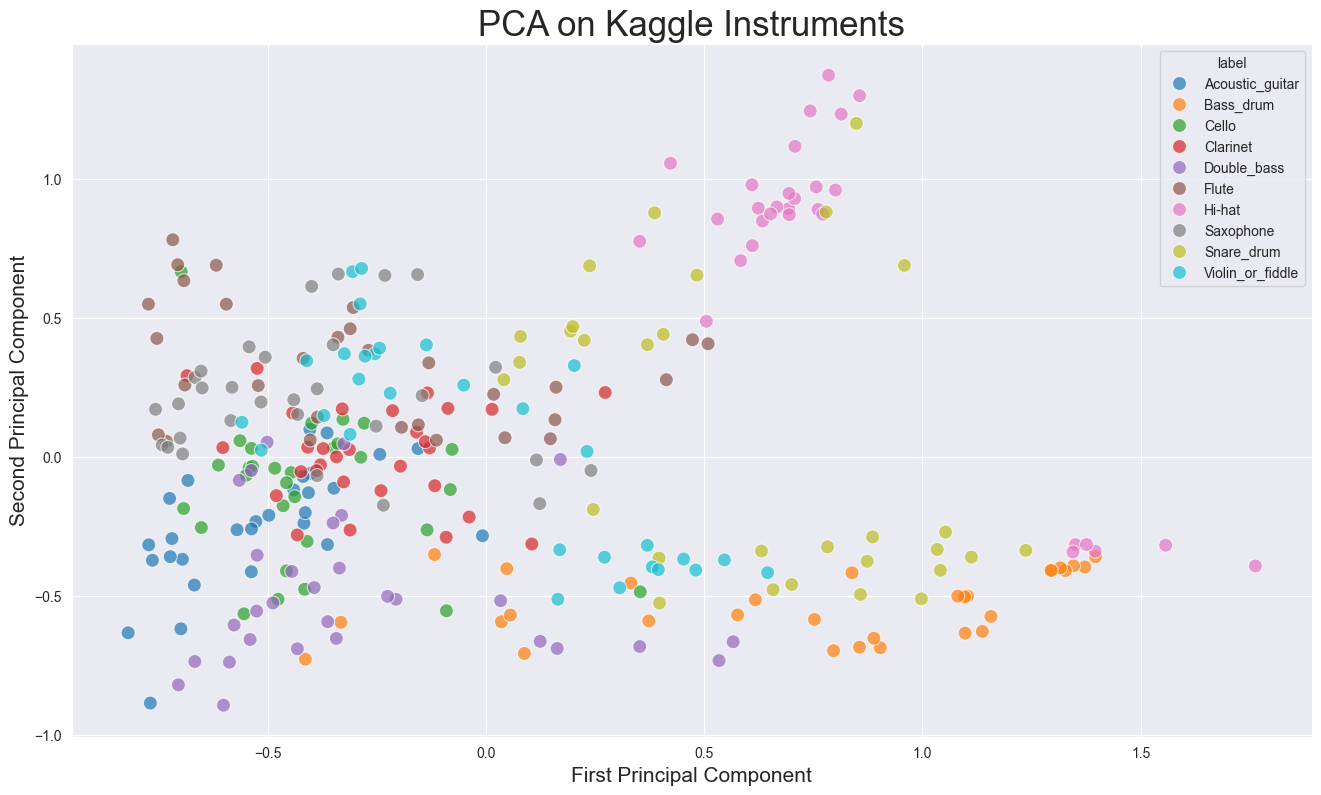

In [14]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']


#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100)
plt.title('PCA on Kaggle Instruments', fontsize = 25)
plt.xlabel("First Principal Component", fontsize = 15)
plt.ylabel("Second Principal Component", fontsize = 15)